In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn.metrics import accuracy_score



In [ ]:
data = datasets.load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [18]:
df.target.value_counts() 

target
1    71
0    59
2    48
Name: count, dtype: int64

In [3]:
# Train test split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Full tree

In [ ]:
# Model definition
model = DecisionTreeClassifier(random_state=42)

# Model training
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Test set evaluation
y_pred = model.predict(X_test)

# Accuracy score  
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.94


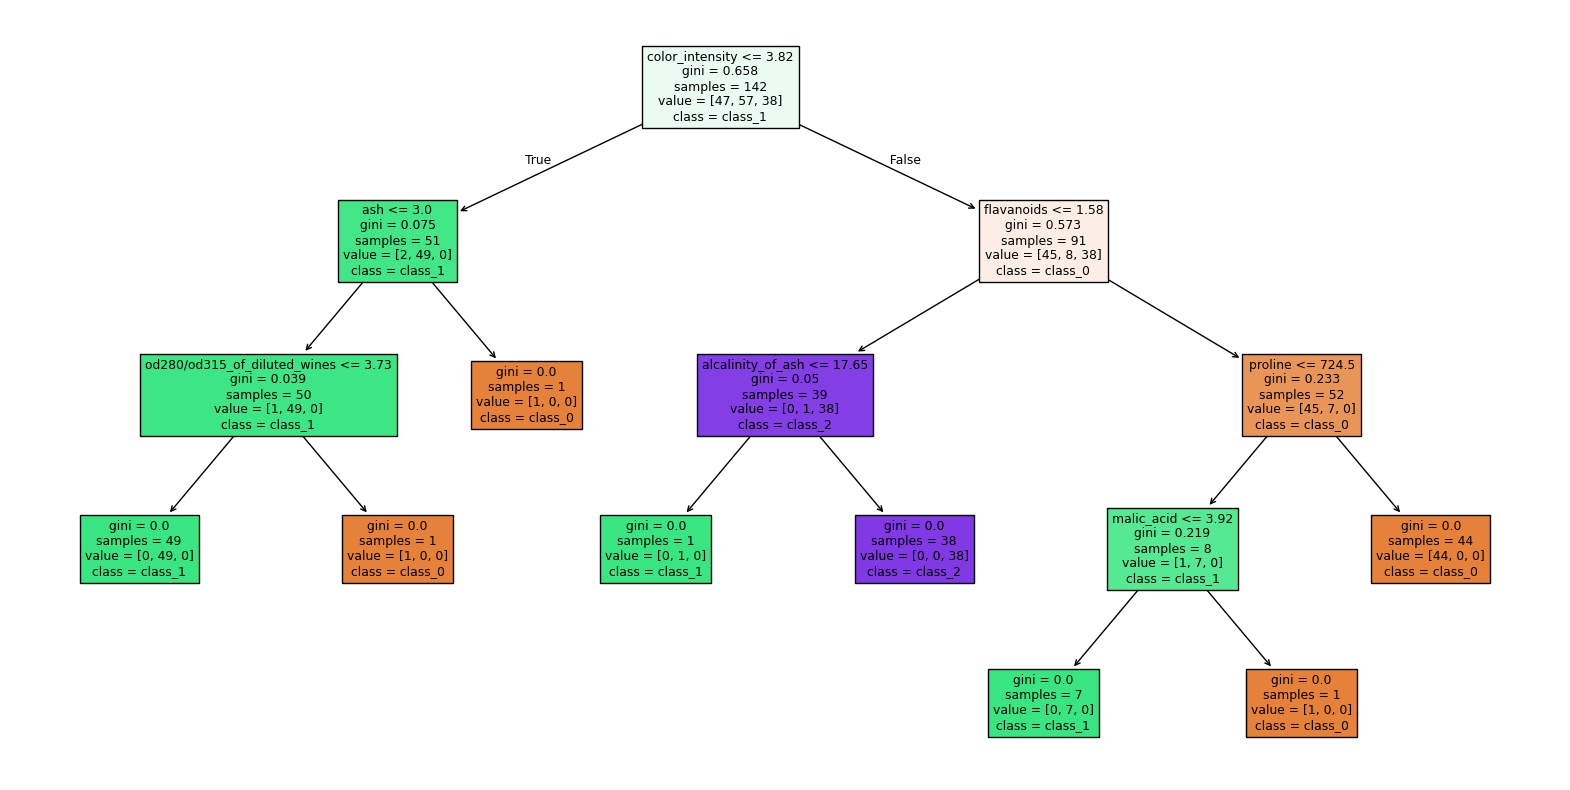

In [6]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


C:\Users\vinor\AppData\Local\Temp\ipykernel_31880\1649768808.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


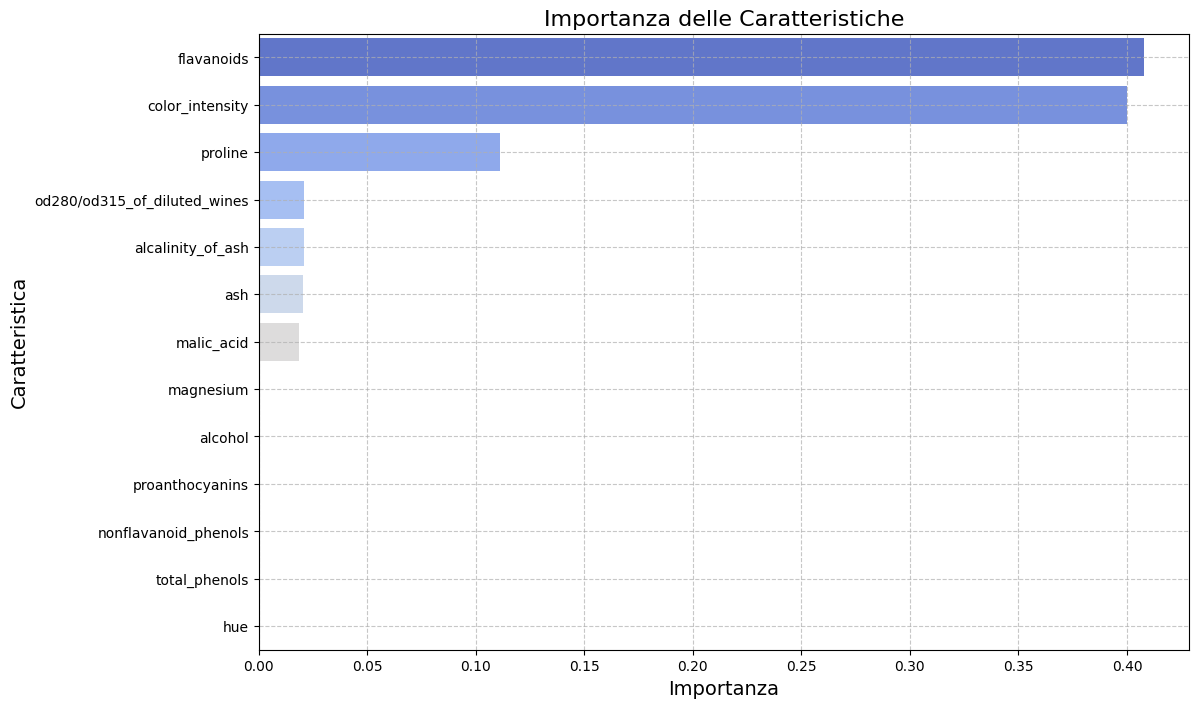

In [7]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Pre-pruning


In [ ]:
# Model with pre-pruning
# min_samples_split: The minimum number of samples required to split an internal node
# max_depth: The maximum depth of the tree (limits how deep the tree can grow)
# min_samples_leaf: The minimum number of samples required to be at a leaf node
model_pre_pruned = DecisionTreeClassifier(max_depth=2, min_samples_split=10, min_samples_leaf=5, random_state=42)
model_pre_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pre_pruned = model_pre_pruned.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Accuracy with pre-pruning: {accuracy_pre_pruned:.2f}')

Accuracy with pre-pruning: 0.86


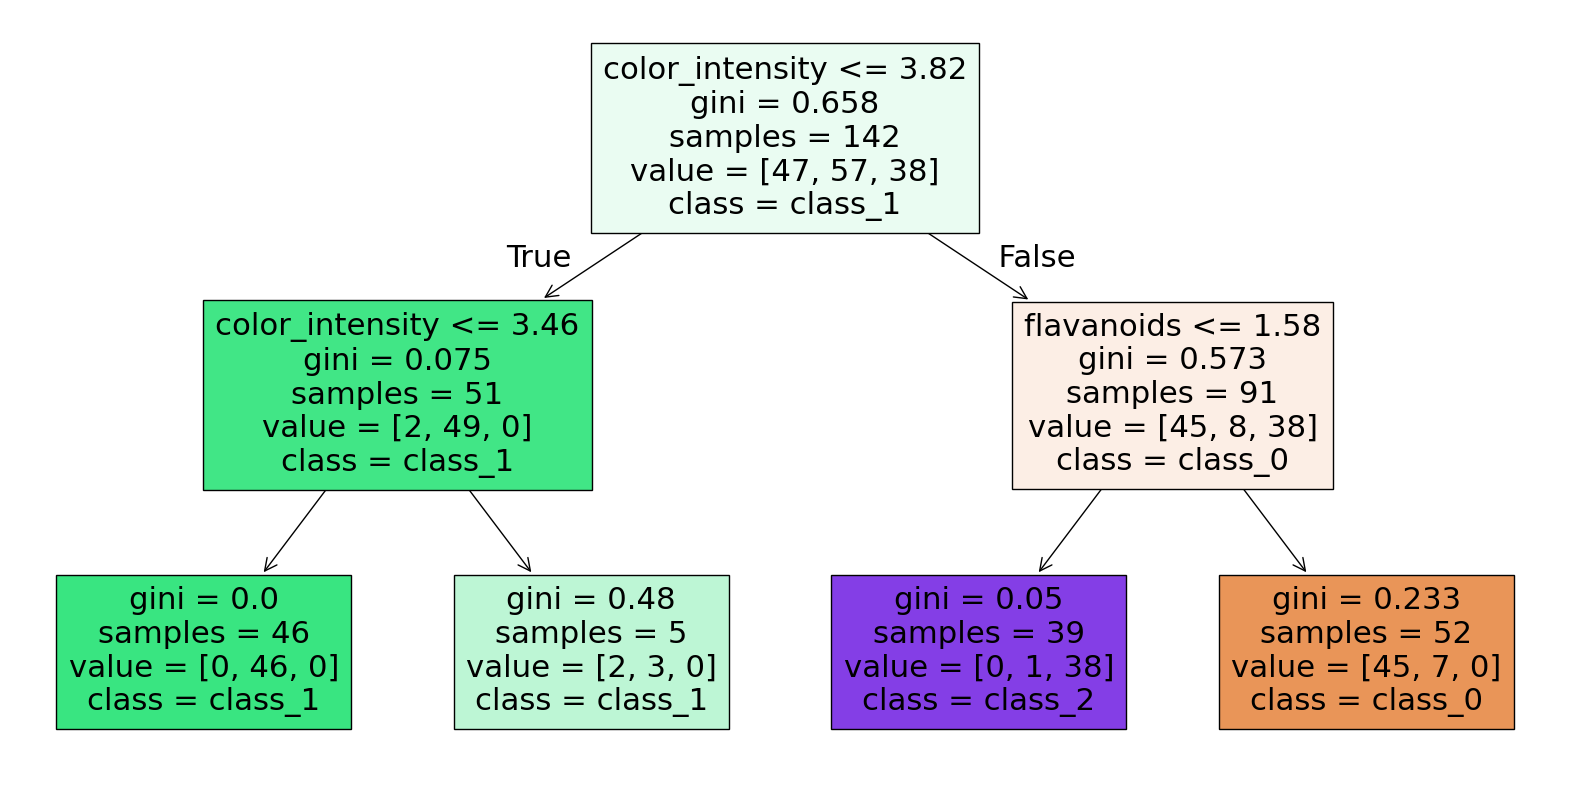

In [17]:
plt.figure(figsize=(20,10))
plot_tree(model_pre_pruned, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


C:\Users\vinor\AppData\Local\Temp\ipykernel_31880\2238535049.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


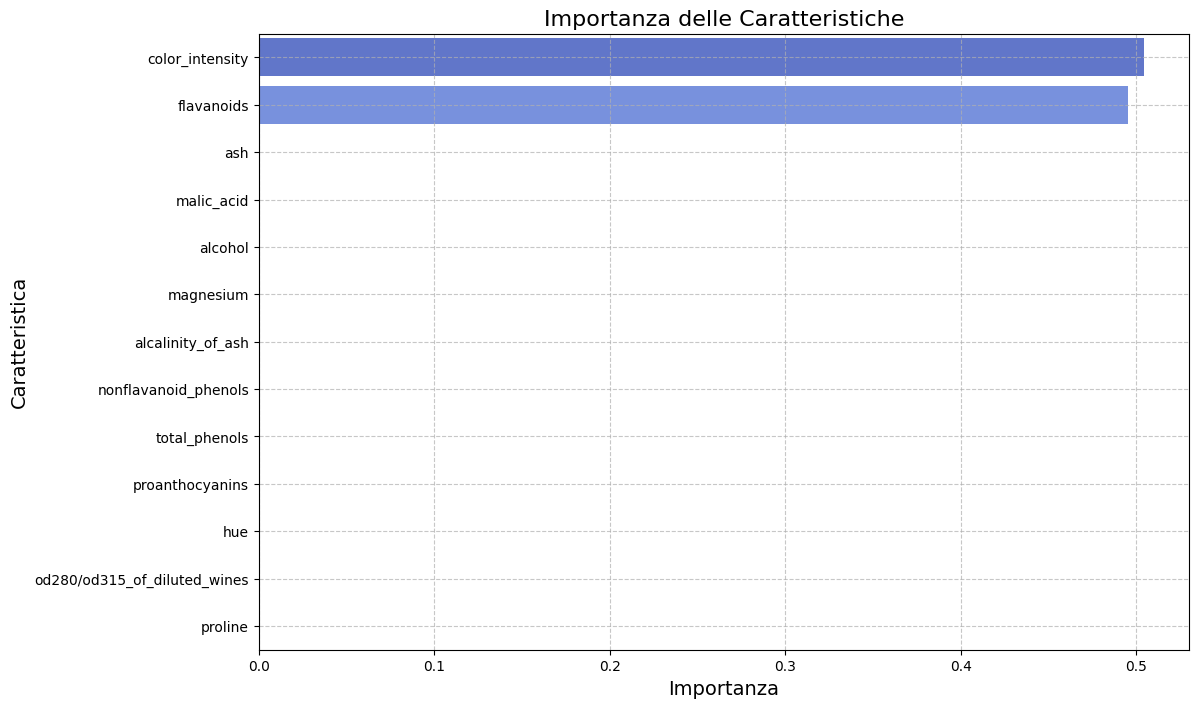

In [15]:
# Feature importance
importances = model_pre_pruned.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Post-pruning

In [ ]:
# Model with post-pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

from sklearn.model_selection import GridSearchCV

# Prepare a grid of alpha values (you may want to use a subset of ccp_alphas)
param_grid = {'ccp_alpha': ccp_alphas}

# Use cross-validation to find the best alpha
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Get the best model
model_pruned = grid_search.best_estimator_
best_alpha = grid_search.best_params_['ccp_alpha']

# Evaluate on the test set
y_pred = model_pruned.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f'Best alpha: {best_alpha}')
print(f'Best accuracy after post-pruning: {final_accuracy:.2f}')


Best alpha: 0.0
Best accuracy after post-pruning: 0.94


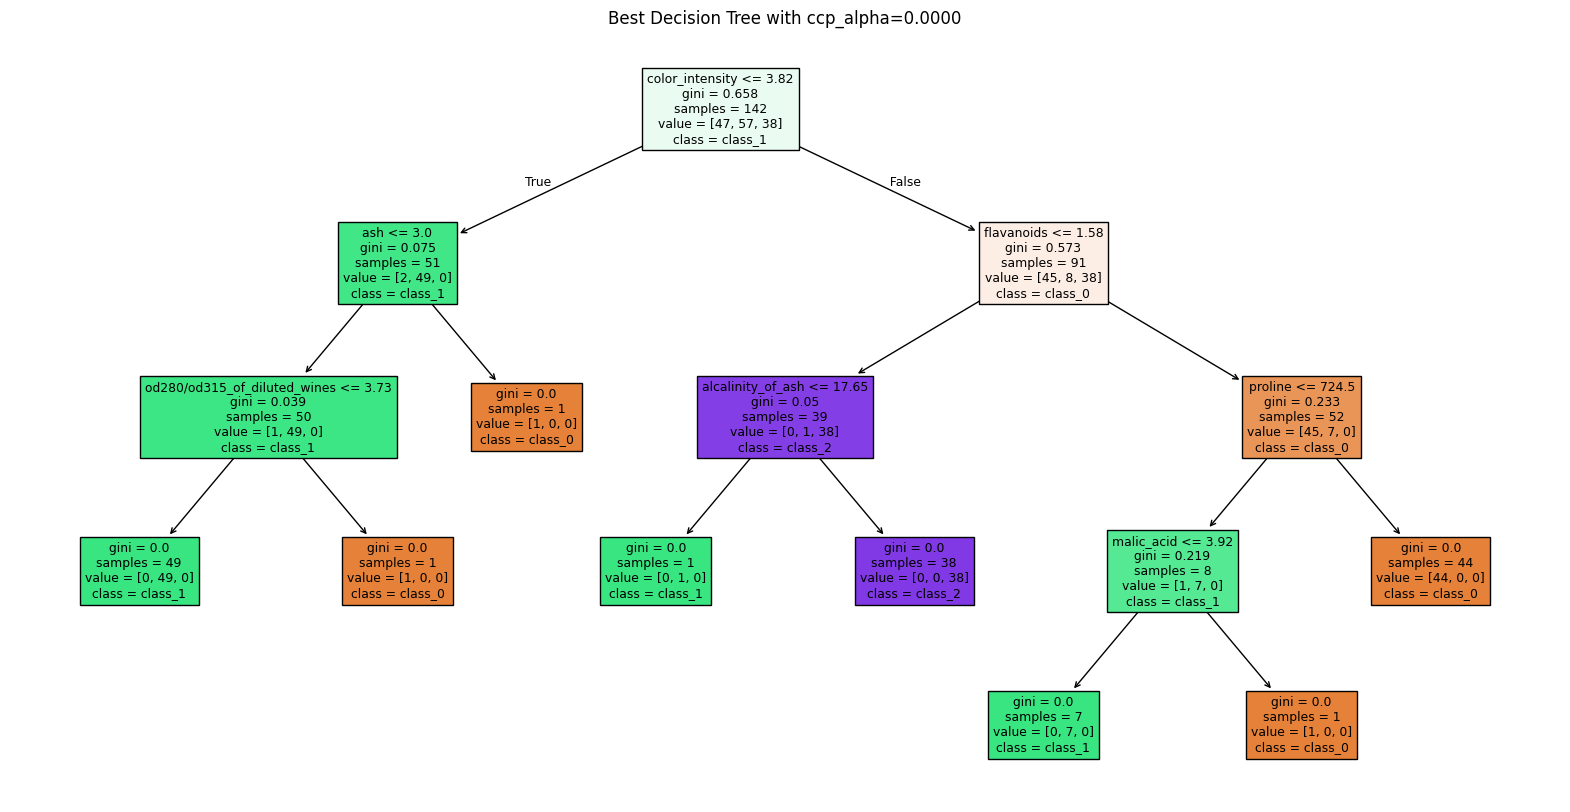

In [19]:
# Best model visualization
plt.figure(figsize=(20, 10))
plot_tree(model_pruned, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title(f'Best Decision Tree with ccp_alpha={model_pruned.ccp_alpha:.4f}')
plt.show()

C:\Users\vinor\AppData\Local\Temp\ipykernel_31880\1487018595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


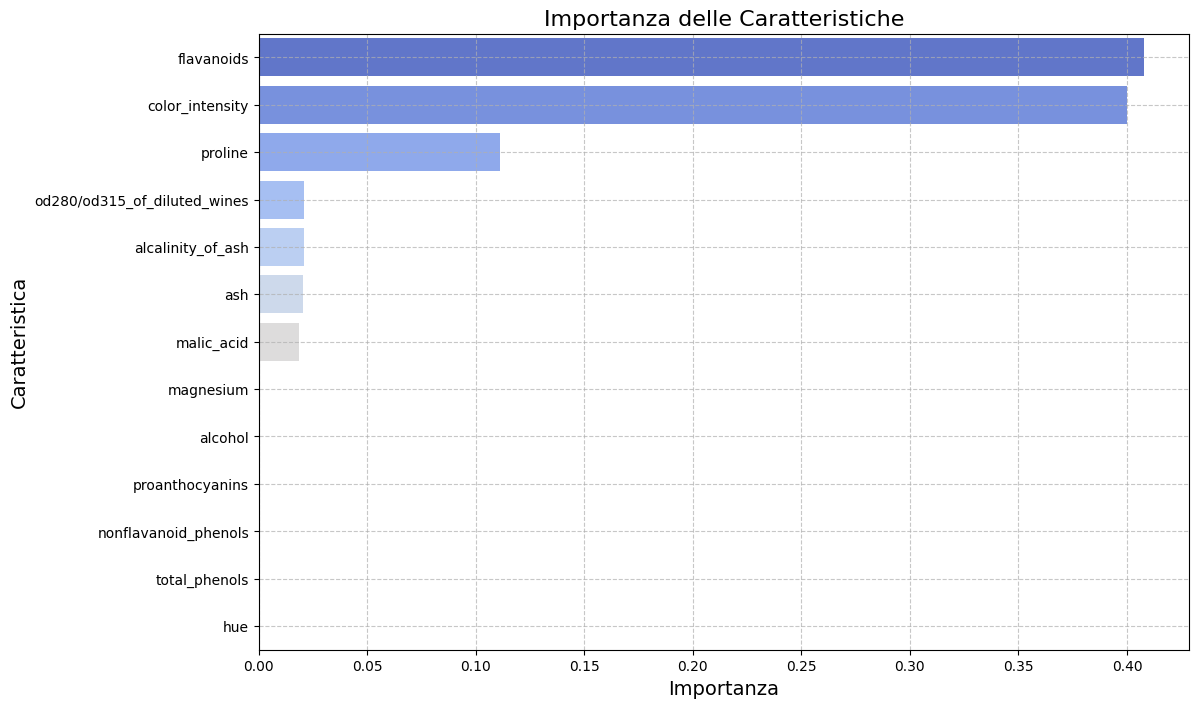

In [10]:
importances = model_pruned.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()